In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(5, 5)})

## Read Data

In [2]:
df = pd.read_csv('world-happiness-report.csv')
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


## Explarotary  Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [4]:
df['Country name'].value_counts()

Uganda      15
Canada      15
Bolivia     15
Japan       15
Cameroon    15
            ..
Oman         1
Suriname     1
Guyana       1
Cuba         1
Maldives     1
Name: Country name, Length: 166, dtype: int64

In [5]:
df.describe().T
# Mesela: yılın min değeri 2005, max değeri 2020. Yani 2005-2020 arası gösteriyor. Social support ort. olarak 0.8 diyebiliriz. Bunun min değeri 0.29, ortalamanın çok altında.

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


## Visualize Data & Preprocessing

In [6]:
from os import mkdir # Dosya oluşturup bu grafikleri kaydetmek için import ettik.

In [7]:
try:
    mkdir('Plots') #plots dosyası oluşturmak için.
except:
    pass

mypath = 'Plots'

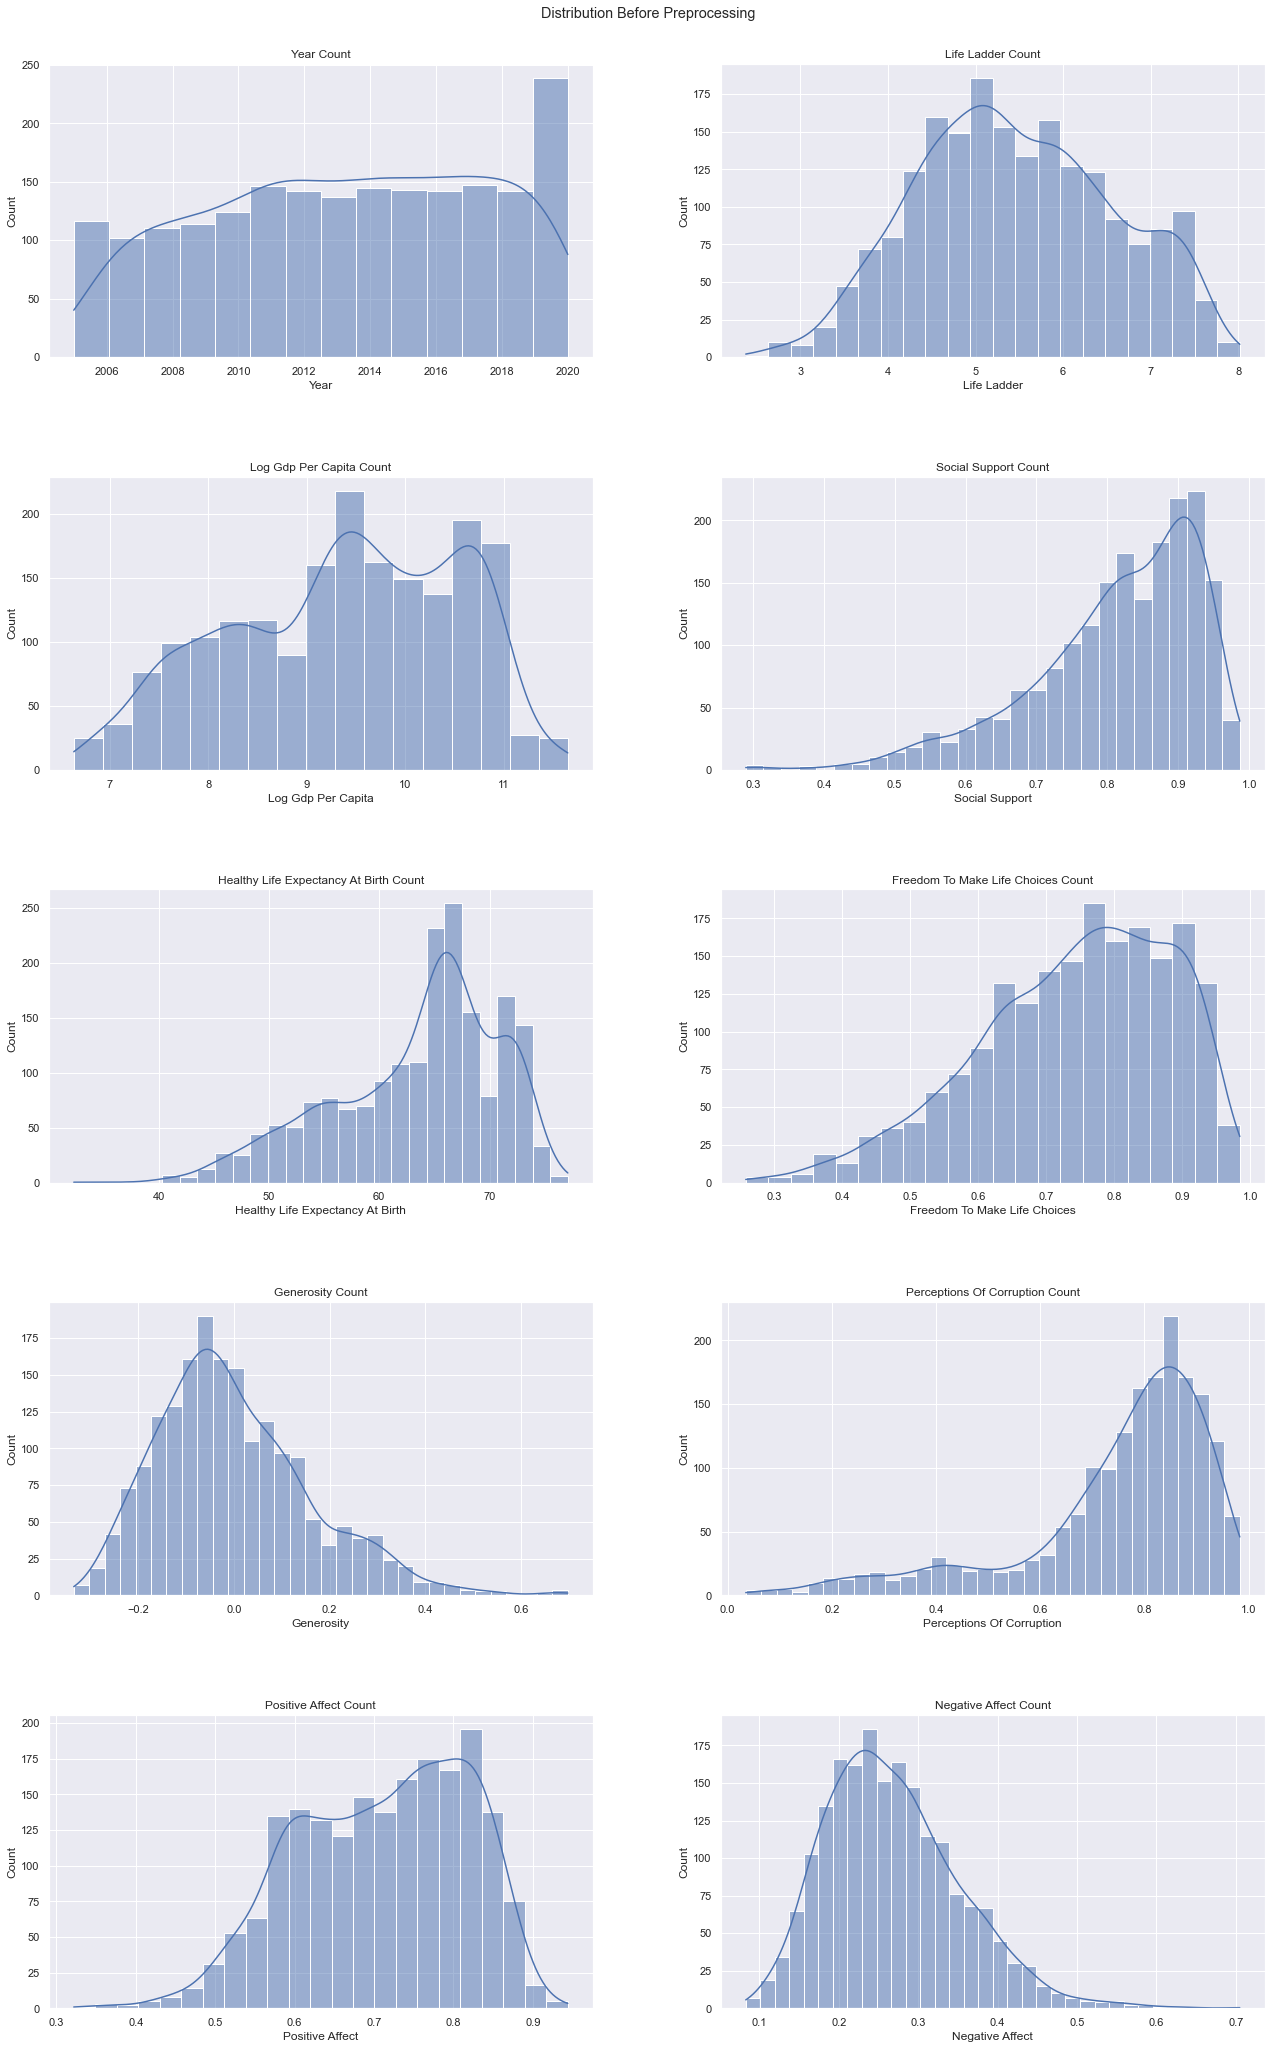

In [8]:
f, axes = plt.subplots(5, 2, figsize=(20,30)) #5 row, 2 column olacak şekilde subplot oluştur diyoruz.
f.tight_layout(pad=8) #plotlar görseller arası boşluğu ayarlıyor.
f.suptitle('Distribution Before Preprocessing') #suptitle üstyazı, subtitle altyazı.
cols = df.select_dtypes(exclude="object").columns #object hariç bütün columnları aldık.

x_axis = 0
y_axis = 0
#bunları neden yazdık? Zira döngü açacağız, tek tek snsplot yapmak yerine döngüde yapacağız.

for col in cols:
    sns.histplot(data=df, x=col, kde=True, ax=axes[x_axis, y_axis])
    axes[x_axis,y_axis].set_xlabel(col.title())
    axes[x_axis,y_axis].set_ylabel('Count')
    axes[x_axis,y_axis].set_title(f"{col.title()} Count")

    if y_axis == 1:
        y_axis = 0
        x_axis += 1
    else:
        y_axis += 1

plt.savefig('Plots/histograms.png')
plt.show()

Şimdi bunları hızlıca yorumlayalım:
* life ladder'da normal dağılım var gibi.
* social support'un daha farklı bir durum var. mesela bazı ülkelerde social support düşük olduğu için bu dağılımı etkilemiş olabilir diyebiliriz.

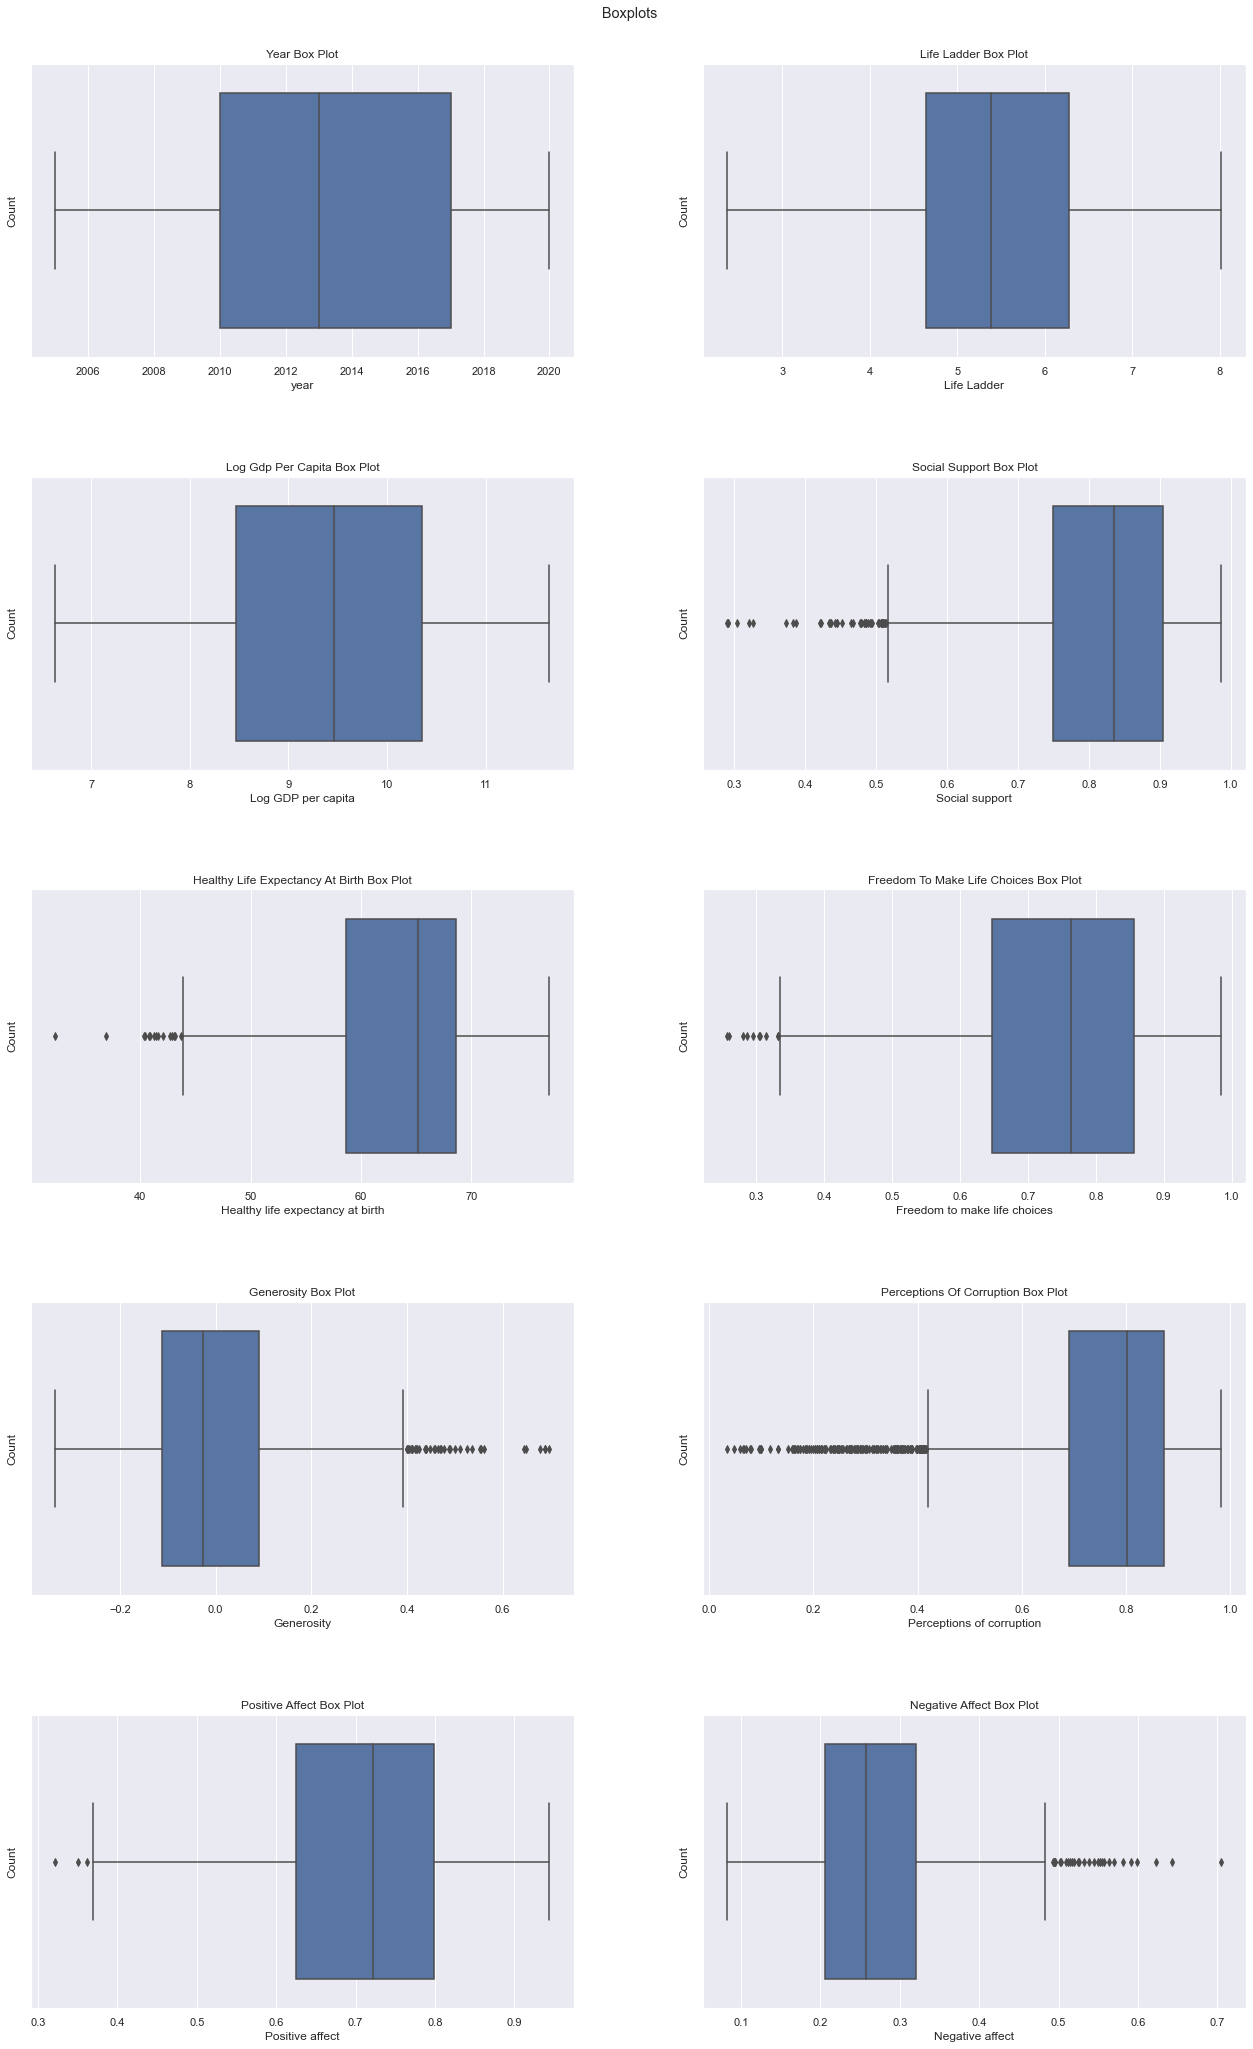

In [9]:
#Boxplot

f, axes = plt.subplots(5, 2, figsize=(20,30))
f.tight_layout(pad=8)
f.suptitle('Boxplots')
cols = df.select_dtypes(exclude="object").columns

x_axis = 0
y_axis = 0

for col in cols:
    sns.boxplot(data=df, x=col, ax=axes[x_axis, y_axis])
    axes[x_axis,y_axis].set_xlabel(col)
    axes[x_axis,y_axis].set_ylabel('Count')
    axes[x_axis,y_axis].set_title(f"{col.title()} Box Plot")

    if y_axis == 1:
        y_axis = 0
        x_axis += 1
    else:
        y_axis += 1

plt.savefig('Plots/boxplots.png')
plt.show()

## Grouping Data By Year For Visualization

In [10]:
year_group = df.groupby('year').sum() #Toplamlarına göre grupladı.
year_group

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2005,174.049,273.204,24.230,1809.200,20.738,0.256,17.897,19.464,6.650
2006,462.524,795.897,74.387,5292.980,62.821,0.539,62.727,63.999,22.406
2007,552.664,935.641,80.777,6191.832,69.421,1.513,77.629,71.627,25.522
2008,596.036,1008.400,86.283,6614.995,73.654,2.342,81.761,76.274,26.790
2009,622.174,1046.810,92.555,6928.501,76.989,-0.607,84.736,79.789,27.909
2010,681.604,1155.443,99.824,7631.352,86.408,0.416,90.111,85.458,28.881
2011,791.916,1346.593,116.406,8771.909,106.167,-2.079,104.218,101.726,36.328
2012,773.013,1314.683,114.887,8597.511,100.285,-0.274,100.050,100.394,36.958
2013,739.055,1274.760,110.498,8422.422,98.994,-0.021,99.254,96.110,37.157


In [11]:
year_group_mean = df.groupby('year').mean() #Ortalamalarına göre grupladı.
year_group_mean

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2005,6.446259,10.118667,0.897407,67.007407,0.829520,0.256000,0.715880,0.748615,0.255769
2006,5.196899,9.044284,0.835809,60.147500,0.730477,0.006654,0.755747,0.719090,0.254614
2007,5.418275,9.172951,0.807770,61.305267,0.687337,0.014833,0.792133,0.709178,0.250216
2008,5.418509,9.167273,0.784391,61.249954,0.688355,0.021486,0.764121,0.706241,0.243545
2009,5.457667,9.263805,0.819071,62.418928,0.687402,-0.005372,0.763387,0.706097,0.246982
2010,5.496806,9.393846,0.831867,63.069025,0.708262,0.003382,0.757235,0.712150,0.240675
2011,5.424082,9.286848,0.802800,62.212121,0.732186,-0.014438,0.755203,0.701559,0.248822
2012,5.443754,9.390593,0.809063,63.216993,0.711241,-0.002060,0.757955,0.707000,0.260268
2013,5.394562,9.373235,0.806555,63.326481,0.727897,-0.000158,0.763492,0.711926,0.271219


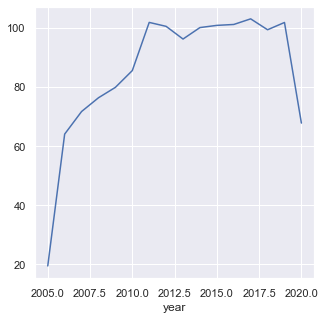

In [12]:
#Lineplot üzerinde gösterelim.
year_group['Positive affect'].plot()
plt.savefig('Plots/Positive_Affect.png')
#bunu hızlıca yorumlayalım: yıllara göre artan bir trend var. Daha sonra hızlı bir düşüş yaşanmış.

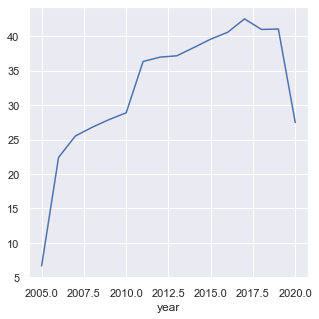

In [13]:
year_group['Negative affect'].plot()
plt.savefig('Plots/Negative_Affect.png')

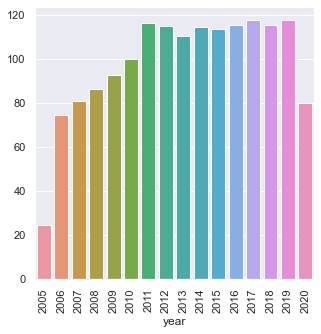

In [14]:
#Şimdi social support'u yıl bazında inceleyelim. Her yılı kategori olarak görelim. Her yıl ne kadar social support imkanı olduğunu barplot üzerinde görelim.
ax1 = sns.barplot(x=year_group.index, y=year_group['Social support'].values) #buradaki year_group'un indexleri yıllar. y de bunların değerleri.
ax1.tick_params(axis='x', rotation=90) # x parametrelerini 90 derece çevirdik.
plt.savefig('Plots/SocialSupport_Barplot.png')

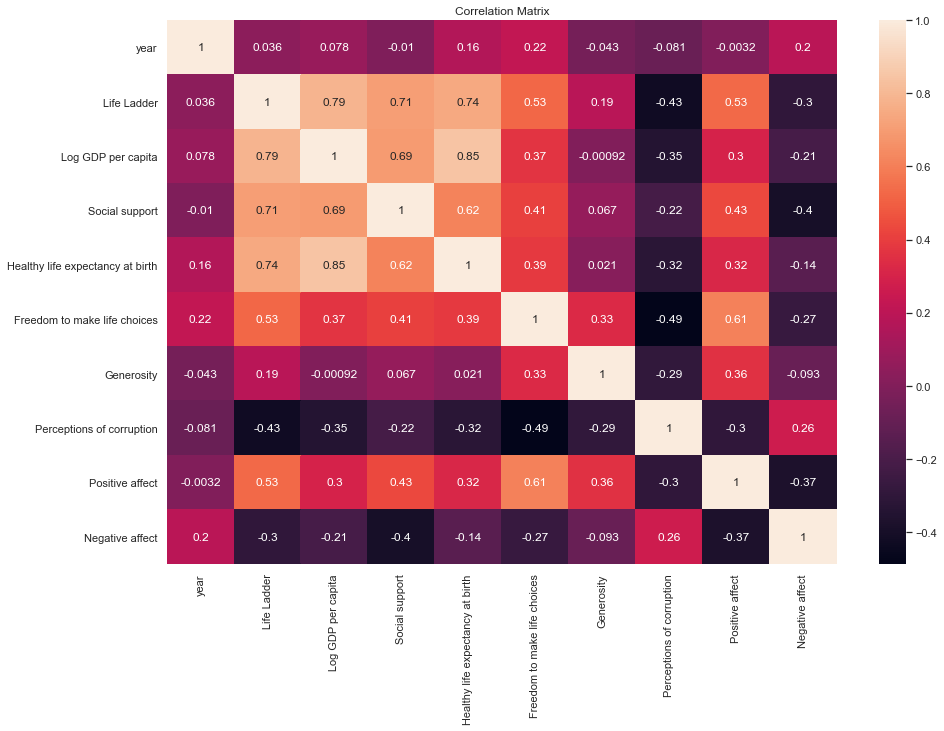

In [16]:
#Heatmap

sns.set(rc={'figure.figsize': (15,10)})
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot=True)
plt.savefig('Plots/Corr_Matrix.png')

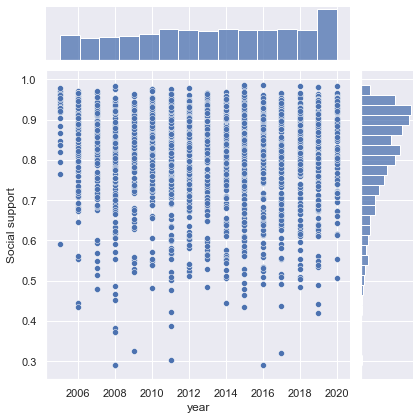

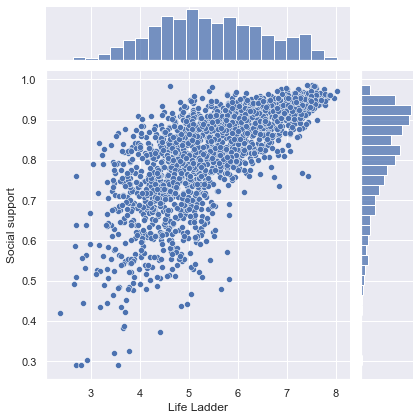

In [18]:
#Joinplot

sns.jointplot(data=df, x='year', y='Social support')
sns.jointplot(data=df, x='Life Ladder', y='Social support')

## Exporting Reports as PDF

* Burada, oluşturduğumuz grafikleri pdf olarak dışa aktaracağız.

In [19]:
import os
from os import listdir, mkdir
from os.path import isfile, join

In [20]:
all_files = os.listdir('Plots/')
reports = [f"Plots/{file}" for file in all_files]
print(reports)

['Plots/histograms.png', 'Plots/boxplots.png', 'Plots/Negative_Affect.png', 'Plots/Positive_Affect.png', 'Plots/SocialSupport_Barplot.png', 'Plots/Corr_Matrix.png']


In [21]:
!pip install FPDF

  Created wheel for FPDF: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=e3c4e155f8b50d22d1972d43fd5a421082febbb4b31eb0abe6229f0032aa42c3
  Stored in directory: /Users/mustafa/Library/Caches/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built FPDF


In [22]:
from fpdf import FPDF

In [23]:
WIDTH = 210
HEIGHT = 297

In [25]:
pdf = FPDF()
pdf.set_font('Arial', 'B', 56)

pdf.add_page()
pdf.cell(180, 20, txt='REPORT', align='C')

for report in reports:
    pdf.add_page()

    pdf.set_font('Arial', 'B', 24)
    pdf.cell(180, 20, txt=report, align='C')

    pdf.image(report, 5, 30, WIDTH-5)

pdf.output('Countries_Report.pdf', 'F')

''